# Linear Regression: combining all components

The objective of this notebook is to combine all components that we implemented in [Linear_Regression_(from_scratch).ipynb](file:///Users/sampadk04/Desktop/Programming/VSCode-Projects/Python/IITM/IITM-MLT/W2_Linear_Regression/Linear_Regression_(from_scratch).ipynb) a single place and make it available for training Linear Regression model on different datasets.

In [1]:
from IPython.display import display, Math, Latex
# This is imported for proper rendering of Latex in Notebook.

import numpy as np

# import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Combining the implementation of different components of Linear Regression implemented in [Linear_Regression_(from_scratch).ipynb](file:///Users/sampadk04/Desktop/Programming/VSCode-Projects/Python/IITM/IITM-MLT/W2_Linear_Regression/Linear_Regression_(from_scratch).ipynb) into a single `LinearRegression` class.

In [20]:
class LinReg(object):
    '''
    Linear Regression model
    -----------------------
    y = X@w
    X: Feature matrix
    w: Weight vector
    y: Label vector
    '''

    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    
    def predict(self, X:np.ndarray) -> np.ndarray:
        '''Prediction of output label for a given input.

        Args:
            X: Feature matrix for given inputs
        
        Returns:
            y: Output label vector as predicted by the given model
        '''

        y = X @ self.w
        
        return y
    
    def loss(self, X:np.ndarray, y:np.ndarray) -> float:
        '''Calculate loss for a model based on actual labels.

        Args:
            X: Feature matrix for given inputs
            y: Output label vector as known from the dataset (actual labels)
        
        Returns:
            Loss
        '''

        e = y - self.predict(X)

        return (1/2) * (np.transpose(e) @ e)
    
    def rmse(self, X:np.ndarray, y:np.ndarray) -> float:
        '''Calculate root mean squared error of prediction based on actual labels.

        Args:
            X: Feature matrix for given inputs
            y: Output label vector as known from the dataset (actual label)
        
        Returns:
            RMSE
        '''
        return np.sqrt((2/X.shape[0]) * self.loss(X,y))
    
    # Normal Equation based estimation
    def fit(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        '''Estimate parameters of linear regression model with normal equation.

        Args:
            X: Feature matrix for given inputs
            y: Output label vector as known from the dataset (actual label)
        
        Returns:
            Weight vector via normal equation
        '''
        self.w = np.linalg.pinv(X) @ y
        return self.w
    
    def calculate_gradient(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        '''Calculate gradients of loss function w.r.t. weight vector on training set.

        Args:
            X: Feature matrix for given inputs
            y: Output label vector as known from the dataset (actual label)
        
        Returns:
            A vector of gradients
        '''
        return np.transpose(X) @ (self.predict(X) - y)
    
    def update_weights(self, grad:np.ndarray, lr:float) -> np.ndarray:
        '''Update the weights based on the gradient of the loss function.

        Weight updates are carried out with the following formula:
            w_new := w_old - lr * grad
        
        Args:
            grad: Gradient of loss w.r.t w
            lr: Learning rate
        
        Returns:
            Updated weight vector
        '''
        return self.w - lr * grad
    
    # Dynamic learning rate
    def learning_schedule(self, t):
        return self.t0/(t + self.t1)
    
    # GD - Gradient Descent
    def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
        '''Estimates parameters of linar regression model through gradient descent.
        
        Args:
            X: Feature matrix for training data
            y: Output label for training data vector
            num_epochs: Number of training steps
            lr: Learning rate
        
        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        
        for i in np.arange(0, num_epochs):
            dJdW = self.calculate_gradient(X,y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y))
            self.w = self.update_weights(dJdW, lr)
        
        return self.w
    
    # MBGD - Mini-Batch Gradient Descent
    def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int) -> np.ndarray:
        '''Estimates parameters of linar regression model through mini-batch gradient descent.
        
        Args:
            X: Feature matrix for training data
            y: Output label for training data vector
            num_epochs: No. of epochs (no. of times MBGD is done over the whole training set)
            batch_size: Size of each mini-batch, after which we update the weights
        
        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                
                # ith mini-batch
                Xi = X_shuffled[i:i + batch_size]
                yi = y_shuffled[i:i + batch_size]

                lr = self.learning_schedule(mini_batch_id)
                gradients = (2/ batch_size) * self.calculate_gradient(Xi, yi)

                self.w_all.append(self.w)
                self.err_all.append(self.loss(Xi, yi))
                self.w = self.update_weights(gradients, lr)
        
        return self.w
    
    # SGD - Stochastic Gradient Descent
    def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int) -> np.ndarray:
        '''Estimates parameters of linar regression model through stochastic gradient descent.
        
        Args:
            X: Feature matrix for training data
            y: Output label for training data vector
            num_epochs: No. of epochs (no. of times MBGD is done over the whole training set)
        
        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []

        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                Xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]

                lr = self.learning_schedule(epoch * X.shape[0] + i)
                gradients = 2 * self.calculate_gradient(Xi, yi)

                self.w_all.append(self.w)
                self.err_all.append(self.loss(Xi,yi))
                self.w = self.update_weights(gradients, lr)
        
        return self.w


## Generate training data

In [3]:
def generate_data(n:int = 100):
    ''' Generates 'n' samples for training linear regression model.
    
    Args:
        n: No. of training samples
    
    Returns:
        n training samples
    '''
    # Create a synthetic dataset of n examples with single feature and a label.
    # For this construction use the following 2 parametres.
    w0,w1 = 4,3

    X = 10 * np.random.rand(n,)

    # Obtain y = 4 + 3*x + noise. Noise is randomly sampled.
    y  = w0 + w1 * X + np.random.randn(n,)

    return X,y

## Preprocessing: Dummy feature and train-test split

In [8]:
def add_dummy_feature(X:np.ndarray):
    ''' Adds a dummy feature to the dataset.
    
    Args:
        X: Training dataset
    
    Returns:
        Training dataset with the addition of dummy feature.
    '''
    return np.column_stack((np.ones(X.shape[0]), X))

def preprocess(X:np.ndarray,y:np.ndarray):
    ''' Adds a dummy feature to the dataset. Then splits the dataset into 2 parts --- 80% for training and 20% for testing.
    
    Args:
        X: Training dataset
        y: Label vector
    
    Returns:
        Training dataset with the addition of dummy feature.
        Testing dataset with the addition of dummy feature.
        Training label vector.
        Testing label vector.
    '''
    X_with_dummy_features = add_dummy_feature(X)

    from sklearn.model_selection import train_test_split
    
    return train_test_split(X_with_dummy_features, y, test_size=0.20, random_state=42)

## Comparing results of Normal Equation, GD, MBGD and SGD

In [9]:
X, y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)

In [22]:
lin_reg = LinReg()

### Normal Equation

In [23]:
lin_reg.fit(X_train,y_train)
print("Weight vector (Normal Equation): ", lin_reg.w)

Weight vector (Normal Equation):  [4.20068815 2.97028158]


This looks approximately correct, because we assumed $[w_0, w_1] = [4,3]$

### Gradient Descent

In [24]:
lin_reg.gd(X_train, y_train, 1000, lr = 1e-4)
print("Weight vector (Gradient Descent): ", lin_reg.w)

Weight vector (Gradient Descent):  [3.5704082  3.06517007]


### Mini-Batch Gradient Descent

In [25]:
lin_reg.mbgd(X_train, y_train, 1000, 16)
print("Weight vector (Mini-Batch Gradient Descent): ", lin_reg.w)

Weight vector (Mini-Batch Gradient Descent):  [4.15115148 2.97808214]


### Stochastic Gradient Descent

In [27]:
lin_reg.sgd(X_train, y_train, 1000)
print("Weight vector (Stochastic Gradient Descent): ", lin_reg.w)

Weight vector (Stochastic Gradient Descent):  [4.17839009 2.95512835]


So, GD, MBGD and SGD seems like a success!

# Linear Regression on multiple features and single label

## Plot learning curves

In [28]:
def plot_learning_curves(err_all):
    plt.plot(err_all)
    plt.xlabel('iteration #')
    plt.ylabel('Loss: $J(w)$')

## Generating datasets with multiple features and single label

We are generating a dataset with $10$ features and will try training Linear Regression on this.

In [31]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=200, n_features=10, n_informative=10, n_targets= 1, shuffle=True, coef=True, noise= 0.5, random_state=0)
# Here, the coeff vector holds the weights which actually want to predict.

In [32]:
print('Shape of feature matrix: ', X.shape)
print('Shape of label vector: ', y.shape)
print('Shape of coefficient vector: ', coef.shape)

Shape of feature matrix:  (200, 10)
Shape of label vector:  (200,)
Shape of coefficient vector:  (10,)


In [33]:
print('Weight vector used for data generation:', coef)

Weight vector used for data generation: [40.05104636 10.32532207 51.90989393  6.18447832 41.09157343 28.46940664
 88.97621358  9.68032193 15.48694157 44.96944303]


We will compare it with weight vector estimated from different methods.

In [34]:
X_train, X_test, y_train, y_test = preprocess(X,y)

### Normal Equation

In [36]:
lin_reg.fit(X_train,y_train)
print("Weight vector (Normal Equation): ", lin_reg.w[1:])
# Ignoring the first variable - lin_reg.w[0].

Weight vector (Normal Equation):  [40.03352283 10.30867897 51.90912772  6.29286567 41.16257809 28.44228619
 88.95433059  9.75752481 15.47239738 44.99809523]


### Gradient Descent

In [40]:
lin_reg.gd(X_train, y_train, 1000, lr = 1e-4)
print("Weight vector (Gradient Descent): ", lin_reg.w[1:])

Weight vector (Gradient Descent):  [40.0335497  10.3081869  51.90922011  6.29241093 41.16194883 28.4422549
 88.95432219  9.75811687 15.47224083 44.99776155]


Text(0.5, 1.0, 'Gradient Descent')

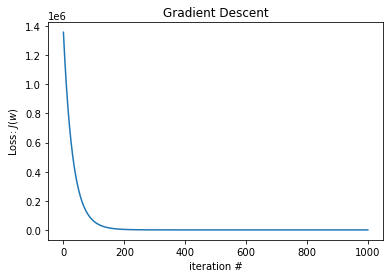

In [41]:
plot_learning_curves(lin_reg.err_all[:1000])
plt.title('Gradient Descent')

### Mini-Batch Gradient Descent

In [42]:
lin_reg.mbgd(X_train, y_train, 1000, 16)
print("Weight vector (Mini-Batch Gradient Descent): ", lin_reg.w[1:])

Weight vector (Mini-Batch Gradient Descent):  [40.03350852 10.30866066 51.90911921  6.2929218  41.16255105 28.44225692
 88.95420357  9.75754028 15.47239742 44.99813388]


Text(0.5, 1.0, 'Mini-Batch Gradient Descent')

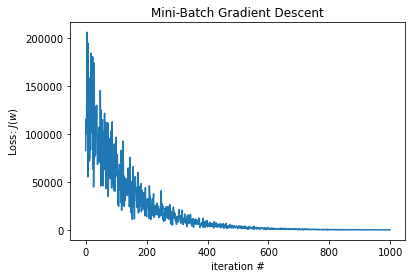

In [43]:
plot_learning_curves(lin_reg.err_all[:1000])
plt.title('Mini-Batch Gradient Descent')

### Stochastic Gradient Descent

In [45]:
lin_reg.sgd(X_train, y_train, 1000)
print("Weight vector (Stochastic Gradient Descent): ", lin_reg.w[1:])

Weight vector (Stochastic Gradient Descent):  [40.01375916 10.3002436  51.90907425  6.28344993 41.15596593 28.42576394
 88.94979142  9.75904099 15.45412143 44.98689012]


Text(0.5, 1.0, 'Stochastic Gradient Descent')

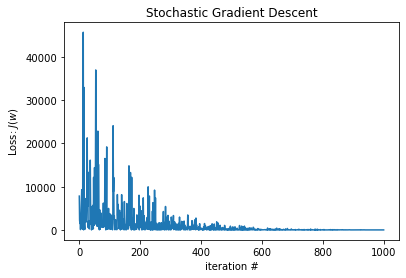

In [46]:
plot_learning_curves(lin_reg.err_all[:1000])
plt.title('Stochastic Gradient Descent')